In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
from scipy.optimize import curve_fit

In [340]:
rabiData = np.loadtxt('/home/qsimexpcontrol/LabRAD/data/MicrowaveRamseyExperiment.dir/01110 - MicrowaveRamseyExperiment.csv',delimiter = ',')

In [3]:
def sinesquarewave(t,w, phi, A, offset):
   return offset + A*(np.sin(w*t + phi)**2)

def linescan(w, t, w0, wR, A, offset):
   x = np.sqrt((2*np.pi*w - 2*np.pi*w0)**2 + 2*np.pi*wR**2)
   return offset + (A*2*np.pi*wR**2/(x**2)) * np.sin(x*t/2)**2

def sinewave(t, w, phi, A, offset):
    return offset + A*np.sin(2*np.pi*w*t + phi)**2

def ramseydecay(t, w, phi, A, offset, T2):
    return A*np.sin(2*np.pi*w*t + phi)*(np.exp(-t/(2*T2))) + offset

In [342]:
x = rabiData[:,0]
y = rabiData[:,1]
sinefit, pcov1 = curve_fit(sinesquarewave, x, y, p0=[0.0233,-0.874, 0.85, 0.05])
print sinefit

[ 0.02328819 -0.80854633  0.78489033  0.07197198]


<IPython.core.display.Javascript object>


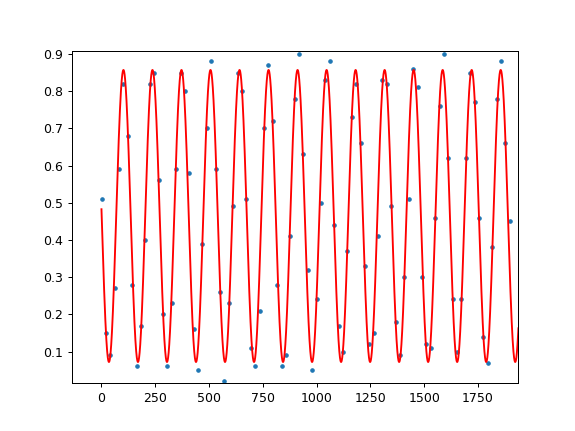

In [343]:
x2 = np.linspace(0, 10000, 100000)
plt.scatter(x,y, s=7)
plt.plot(x2, sinefit[3] + sinefit[2]*np.sin(sinefit[0]*x2 + sinefit[1])**2, color='r')

In [4]:
scanData = np.loadtxt('/home/qsimexpcontrol/LabRAD/data/MicrowaveLineScan.dir/03943 - MicrowaveLineScan.csv',delimiter = ',')

In [11]:
linefit, pcov1 = curve_fit(linescan, x, y, p0=[0.069,14.05, 17.0, 0.94 ,0.01])
print linefit

[ 0.09761774 13.40940986 12.9885264   0.95807565  0.01356356]


In [12]:
x = scanData[:,0]
y = scanData[:,1]
x2 = np.linspace(-50, 75, 100000)

<IPython.core.display.Javascript object>


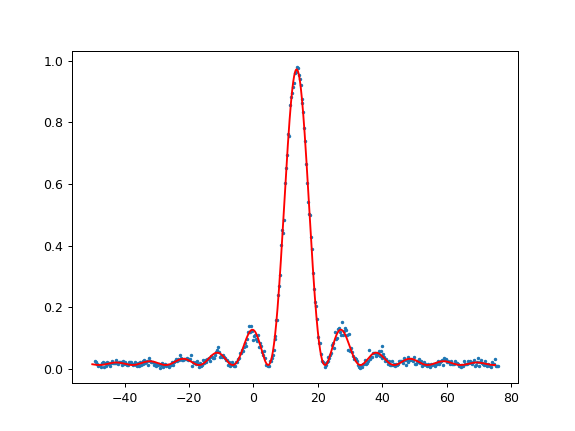

In [13]:
plt.scatter(x,y, s=3)
plt.plot(x2, linescan(x2, linefit[0] , linefit[1], linefit[2] , linefit[3], linefit[4]), color='r' )

In [14]:
rabiData = np.loadtxt('/home/qsimexpcontrol/LabRAD/data/MicrowaveRabiFlopping.dir/00419 - MicrowaveRabiFlopping.csv',delimiter = ',')

In [22]:
x = rabiData[:,0]
y = rabiData[:,1]
x2 = np.linspace(0, 250, 100000)

In [23]:
linefit, pcov1 = curve_fit(sinewave, x, y, p0=[0.005,0, 1, 0.5])
linefit

array([ 0.00480068, -0.03009698,  0.95494004,  0.0141268 ])

<IPython.core.display.Javascript object>


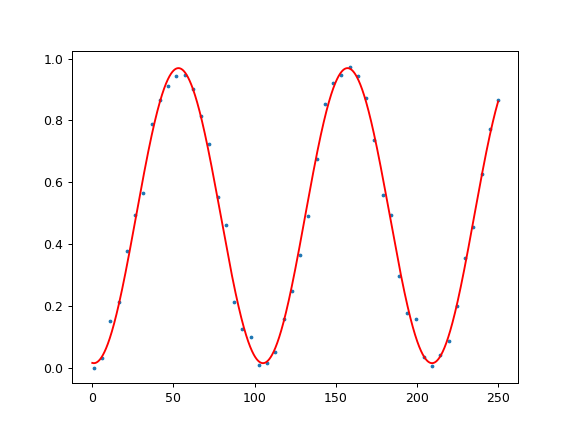

In [24]:
plt.scatter(x, y, s=4)
plt.plot(x2, sinewave(x2, *linefit), color='r' )

In [103]:
ramsey_1 = np.loadtxt('/home/qsimexpcontrol/LabRAD/data/MicrowaveRamseyExperiment.dir/01140 - MicrowaveRamseyExperiment.csv',delimiter = ',')
ramsey_2 = np.loadtxt('/home/qsimexpcontrol/LabRAD/data/MicrowaveRamseyExperiment.dir/01142 - MicrowaveRamseyExperiment.csv',delimiter = ',')
ramsey_3 = np.loadtxt('/home/qsimexpcontrol/LabRAD/data/MicrowaveRamseyExperiment.dir/01143 - MicrowaveRamseyExperiment.csv',delimiter = ',')
ramsey_4 = np.loadtxt('/home/qsimexpcontrol/LabRAD/data/MicrowaveRamseyExperiment.dir/01145 - MicrowaveRamseyExperiment.csv',delimiter = ',')
ramsey_5 = np.loadtxt('/home/qsimexpcontrol/LabRAD/data/MicrowaveRamseyExperiment.dir/01146 - MicrowaveRamseyExperiment.csv',delimiter = ',')
ramsey_6 = np.loadtxt('/home/qsimexpcontrol/LabRAD/data/MicrowaveRamseyExperiment.dir/01147 - MicrowaveRamseyExperiment.csv',delimiter = ',')

In [167]:
x = np.concatenate((ramsey_1[:,0], ramsey_2[:,0], ramsey_3[:,0], ramsey_4[:,0], ramsey_5[:,0], ramsey_6[:,0]))
y = np.concatenate((ramsey_1[:,1], ramsey_2[:,1], ramsey_3[:,1], ramsey_4[:,1], ramsey_5[:,1], ramsey_6[:,1]))
x2 = np.linspace(0, 110000, 5000)

<IPython.core.display.Javascript object>


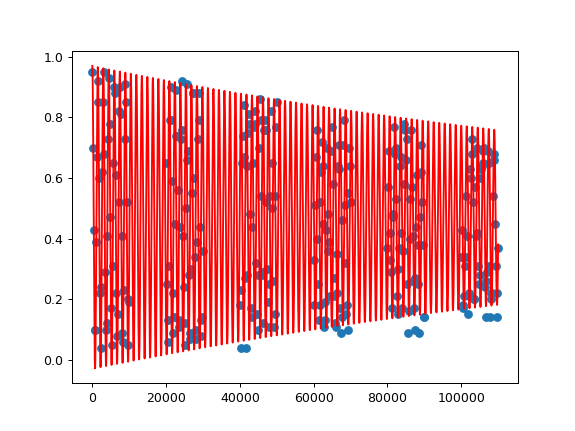

[6.60462962e-04 1.54882950e+00 4.84323144e-01 4.46112076e-01
 5.22587857e+04]


In [193]:
plt.scatter(x,y)
linefit, pcov1 = curve_fit(ramseydecay, x, y, p0=[0.00067, 3.14/2, 0.5, 0.47, 1.0e5]) # t, w, phi, A, offset, T2
print linefit
plt.plot(x2, ramseydecay(x2, *[0.00067, 3.14/2, 0.5, 0.47, 1.0e5]), color='r')